<a href="https://colab.research.google.com/github/LunaOh/MachineLearning/blob/main/%E1%84%89%E1%85%B5%E1%86%B7%E1%84%87%E1%85%AE%E1%84%8C%E1%85%A5%E1%86%AB_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/기계학습/heart_failure_clinical_records_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.isnull().any().any()

False

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

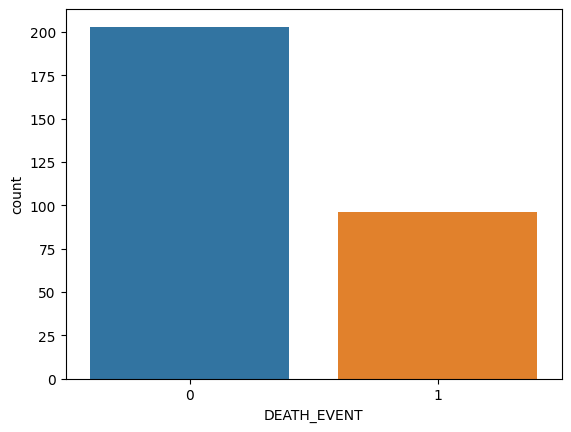

In [28]:
import seaborn as sns
sns.countplot(data=df,x='DEATH_EVENT')

In [29]:
y = df['DEATH_EVENT']
x = df.drop('DEATH_EVENT', axis=1)

In [30]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=2023)

In [31]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# RandomOverSampler 객체 생성
ros = RandomOverSampler(random_state=2023)

# 오버샘플링 수행
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

# 오버샘플링 이후의 클래스 분포 확인
print("오버샘플링 이전의 클래스 분포: ", y_train.value_counts())
print("오버샘플링 이후의 클래스 분포: ", y_train_resampled.value_counts())

오버샘플링 이전의 클래스 분포:  0    57
1    32
Name: DEATH_EVENT, dtype: int64
오버샘플링 이후의 클래스 분포:  0    57
1    57
Name: DEATH_EVENT, dtype: int64


In [32]:
dt_clf = DecisionTreeClassifier(random_state=2023)
dt_clf.fit(x_train_resampled, y_train_resampled) # 학습

DecisionTreeClassifier(random_state=2023)

In [33]:
feature_names = x.columns
class_names = df['DEATH_EVENT'].unique()

In [34]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = ['0','1'], feature_names = feature_names, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


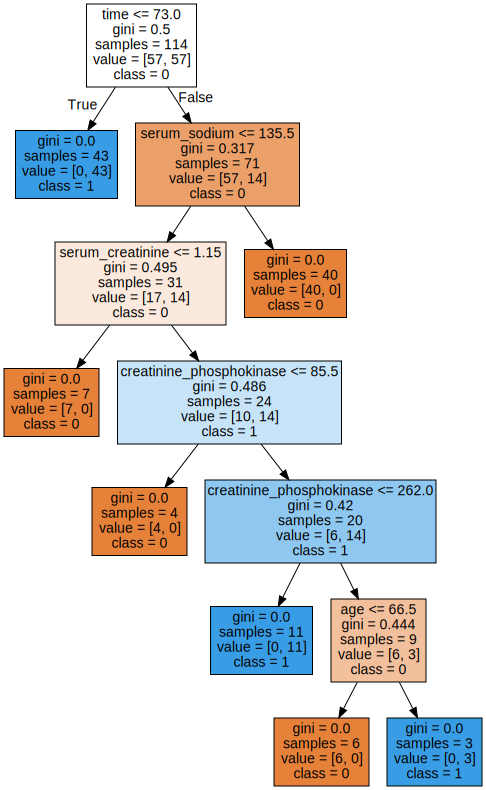

In [35]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [36]:
y_pred = dt_clf.predict(x_test) 

In [37]:
# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train_resampled, y_train_resampled), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average='weighted')
precision = mt.precision_score(y_test, y_pred, average='weighted')
f1 = mt.f1_score(y_test, y_pred, average='weighted')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.780952380952381 

Accuracy:  0.78 

Recall:  0.78 

Precision:  0.79 

F1_score:  0.78 

Confusion Matrix: 
 [[121  25]
 [ 21  43]]


In [38]:
# 교차검증
# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.6388135593220339


In [39]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))


,fit_time,score_time,test_score
0,0.006845,0.002069,0.366667
1,0.003227,0.001798,0.900000
2,0.003130,0.001788,0.716667
3,0.003065,0.002133,0.566667
4,0.004299,0.002606,0.644068


In [40]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.780952380952381

In [61]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, min_samples_split=2, random_state=2023) # max_depth=2으로 제한
pruned_dt_clf.fit(x_train_resampled, y_train_resampled)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train_resampled, y_train_resampled)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))


from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred = pruned_dt_clf.predict(x_test)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1-score: {:.3f}'.format(f1))
print('Confusion Matrix:\n', conf_matrix)

Accuracy of training set: 0.877
Accuracy of test set: 0.814
Precision: 0.791
Recall: 0.752
F1-score: 0.767
Confusion Matrix:
 [[133  13]
 [ 26  38]]


In [62]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = ['0','1'], feature_names = feature_names, impurity=True, filled=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


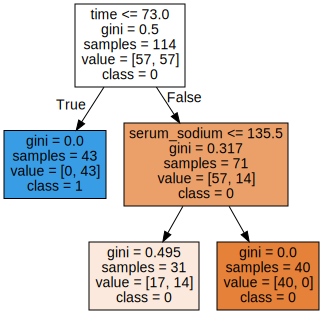

In [64]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)